In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Chargement des données
df = pd.read_csv("amazon_products.csv", parse_dates=["Date"])

In [3]:
# Nettoyage
df['Evaluation'] = pd.to_numeric(df['Evaluation'], errors='coerce') # Gestion des évaluations manquantes
df = df.dropna(subset=['Evaluation'])

In [4]:
# 1. Statistiques globales
print("Nombre total de produits uniques:", df['Titre'].nunique())
print("Prix moyen:", df['Prix'].mean(), "€")
print("Note moyenne globale:", df['Evaluation'].mean())

Nombre total de produits uniques: 13
Prix moyen: 1021.2071153846153 €
Note moyenne globale: 4.286538461538462


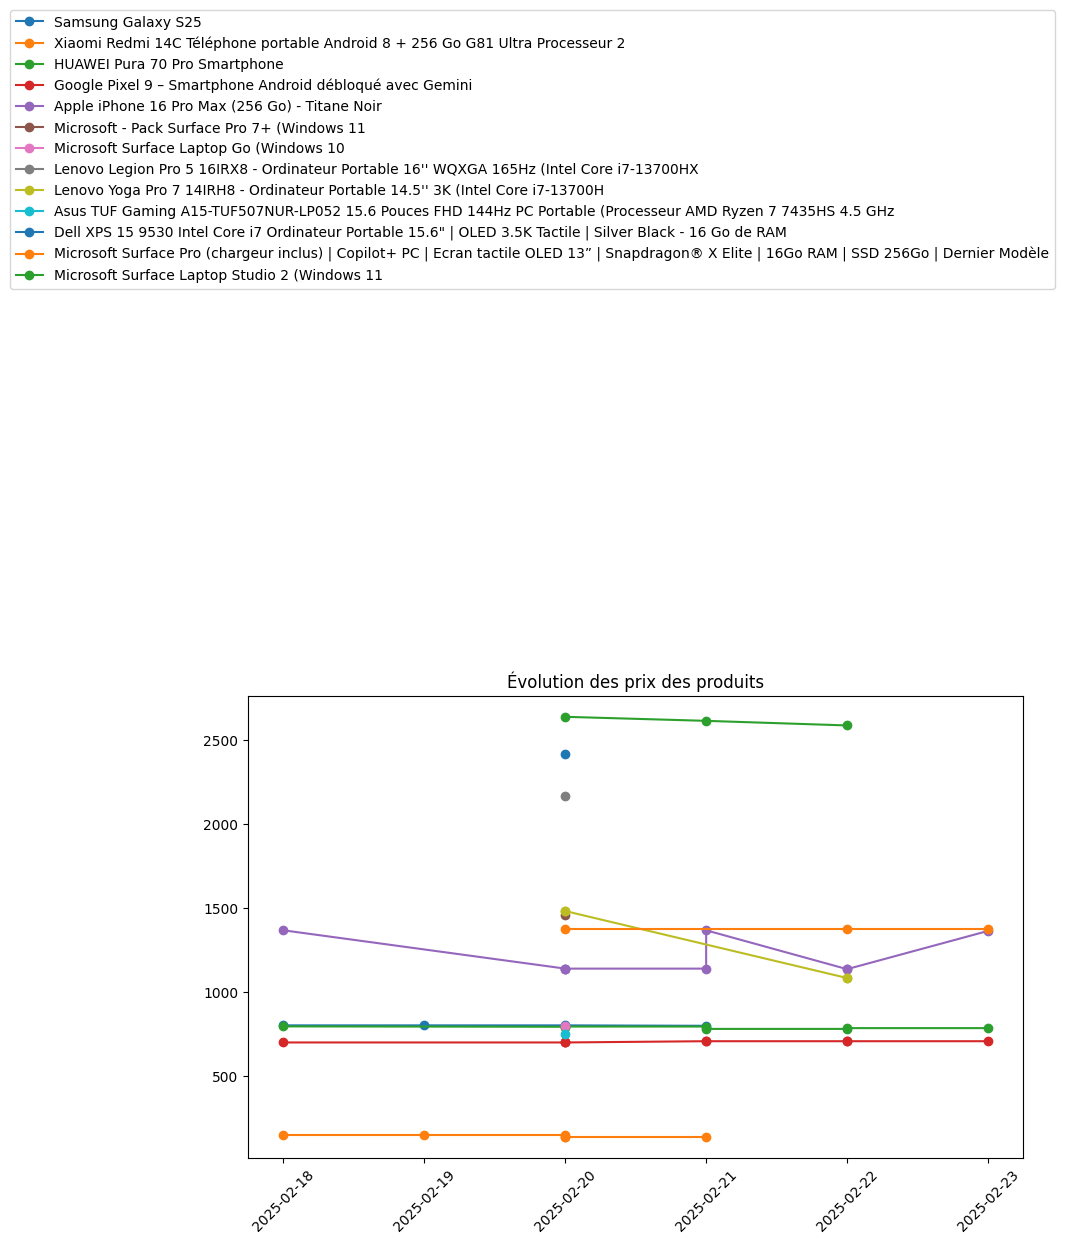

In [ ]:
# 2. Évolution des prix dans le temps
plt.figure(figsize=(10,6))
for produit in df['Titre'].unique():
    subset = df[df['Titre'] == produit]
    plt.plot(subset['Date'], subset['Prix'], label=produit.split(",")[0], marker='o')

plt.title("Évolution des prix des produits")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 2.5))
plt.tight_layout()
plt.show()

In [18]:
# 3. Top 5 des produits les mieux notés
top_notes = df.groupby('Titre')['Evaluation'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 des produits les mieux notés :\n", top_notes)



Top 5 des produits les mieux notés :
 Titre
Microsoft Surface Laptop Studio 2 (Windows 11, écran tactile 14.4 pouces, 32 Go RAM, 1 To SSD, Intel Core i7, NVIDIA GeForce RTX 4050 Ti, Platine, clavier français) Polyvalence, puissance pour réussir    5.0
Microsoft - Pack Surface Pro 7+ (Windows 11, écran Tactile 13'', 16 Go RAM, 256 Go SSD, Intel Core i5) Ordinateur Portable Platine + Clavier AZERTY Noir                                                    4.7
Xiaomi Redmi 14C Téléphone portable Android 8 + 256 Go G81 Ultra Processeur 2,0 GHz, écran 6,88", double caméra AI 50 MP, batterie 5160 mAh, avec charge rapide 18 W, sans NFC (noir)                       4.6
Google Pixel 9 – Smartphone Android débloqué avec Gemini, Appareil Photo avancé, 24 Heures d'autonomie et écran Actua 6,3 Pouces – Noir Volcanique, 256GB                                                   4.4
Microsoft Surface Laptop Go (Windows 10, écran tactile 12,45", Intel Core i5, 8 Go RAM, 256 Go SSD, clavier AZERTY français

In [19]:
# 4. Analyse des marques
df['Marque'] = df['Titre'].apply(lambda x: x.split()[0])
marque_stats = df.groupby('Marque').agg({
    'Prix': 'mean',
    'Evaluation': 'mean',
    'Nombre_d_evaluations': 'sum'
})
print("\nStatistiques par marque:\n", marque_stats)


Statistiques par marque:
                   Prix  Evaluation  Nombre_d_evaluations
Marque                                                  
Apple      1213.976667       4.300                  5543
Asus        749.990000       3.800                    15
Dell       2415.830000       3.600                    17
Google      704.184444       4.400                  3102
HUAWEI      789.452222       4.300                   611
Lenovo     1459.244000       4.160                    48
Microsoft  1776.253750       4.550                   713
Samsung     801.045000       3.425                    23
Xiaomi      143.000000       4.600                    19
